##  Logistic Regression on Titanic dataset
####  https://www.kaggle.com/c/titanic/data

In [1]:
# Logistic regression Math
# cost= -y log(Hx) - (1-y)log(1-Hx) (simplified 2 sep below ones)
# if y=1 cost= -log(Hx)
# if y=0 cost= -log(1-Hx)

#Hypothesis
# h(x)=g(θTx)
# z=θTx
# g(z)=1/1+e^-z

#where θTx = θ0x0 +θ1x1 +θ2x2...

In [1]:
import matplotlib.pyplot as mpl
import pandas as pnd
import numpy as npy
import math

In [2]:
data_train=pnd.read_csv('titanic/train.csv')
data_test=pnd.read_csv('titanic/test.csv')

In [3]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Data preparation

In [5]:
#data_train['Embarked'].unique()
#Has nan so removing rows 
data_train=data_train[data_train['Embarked'].notna()]

"""PREDICTING SURVIVAL"""
y_train=data_train['Survived']


"""FEATURES"""
Pclass=data_train['Pclass'] #Ticket Class 1=1st 2=2nd 3=3rd

#Taking sex as male=0 female=1 (one-hot encoding)
Sex=data_train['Sex']
Sex=Sex.replace('male',0)
Sex=Sex.replace('female',1)

#Age mean normalized
Age=data_train['Age']
age_mean=Age.mean()
Age=Age.fillna(age_mean) #Handling missing ages
Age= (Age - age_mean)/(data_train['Age'].max() - data_train['Age'].min())

#Number of Siblings or Spouses in total
SibSp=data_train['SibSp']

#Number of Parents or Children in total
Parch=data_train['Parch'] 

PortEmb=data_train['Embarked'] #Port of Embarkment C=Cherbourg,Q=Queenstown,S=Southampton
#Taking ports as follows: C=0 Q=1 S=2
PortEmb=PortEmb.replace('C',0)
PortEmb=PortEmb.replace('Q',1)
PortEmb=PortEmb.replace('S',2)

In [6]:
#All Features
pnd.DataFrame({
    'Pclass':Pclass,
    'Sex':Sex,
    'Age':Age,
    'SibSp':SibSp,
    'Parch':Parch,
    'PortEmb':PortEmb
}).head()

,Pclass,Sex,Age,SibSp,Parch,PortEmb
0,3,0,-0.096030,1,0,2
1,1,1,0.105025,1,0,0
2,3,1,-0.045766,0,0,2
3,1,1,0.067327,1,0,2
4,3,0,0.067327,0,0,2


#### Using Manual Gradient Descent

In [43]:
#Starting with random theta values
theta=npy.random.rand(7)
#[0.02769327,0.64988187,0.7119417,0.054223,0.13302037,0.2718905,0.99710355]
theta

array([0.80107889, 0.53586503, 0.28374245, 0.94496792, 0.44239427,
       0.92358069, 0.77410825])

In [44]:
#Setting learn rate and iters
#theta=[0.02769327,0.64988187,0.7119417,0.054223,0.13302037,0.2718905,0.99710355]
alpha=0.1
cnt=6000

0.4423202387400376


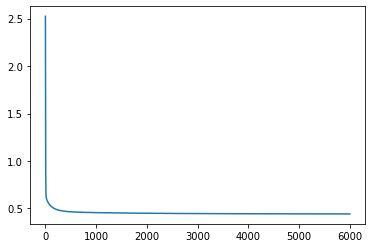

In [45]:
#Starting The Descent
cost=[]
while(cnt>0):
    total_cost=0 #total cost of hypothesis
    s0,s1,s2,s3,s4,s5,s6=0,0,0,0,0,0,0 #summations, 1 for every theta
    for pc,sex,age,ss,pa,pemb,Y in zip(Pclass,Sex,Age,SibSp,Parch,PortEmb,y_train):
        hyp=theta[0]+theta[1]*pc+theta[2]*sex+theta[3]*age+theta[4]*ss+theta[5]*pa+theta[6]*pemb
        H=1/(1+math.exp(-hyp))
        
        #print(H,Y)
        
        total_cost= total_cost + ((-Y*math.log(H))- ((1-Y)*math.log(1-H)))
        
        s0=s0+(H-Y)
        s1=s1+(H-Y)*pc
        s2=s2+(H-Y)*sex
        s3=s3+(H-Y)*age
        s4=s4+(H-Y)*ss
        s5=s5+(H-Y)*pa
        s6=s6+(H-Y)*pemb
    
    cost.append(total_cost/len(y_train))
    
    theta[0]=theta[0]-((alpha/len(y_train))*s0)
    theta[1]=theta[1]-((alpha/len(y_train))*s1)
    theta[2]=theta[2]-((alpha/len(y_train))*s2)
    theta[3]=theta[3]-((alpha/len(y_train))*s3)
    theta[4]=theta[4]-((alpha/len(y_train))*s4)
    theta[5]=theta[5]-((alpha/len(y_train))*s5)
    theta[6]=theta[6]-((alpha/len(y_train))*s6)
    cnt=cnt-1

mpl.plot(cost)
print(cost[-1])
    

In [46]:
theta

array([ 1.41960989, -1.07514096,  2.71416732, -2.4815507 , -0.29033451,
       -0.06946169, -0.23769709])

In [47]:
preds=[]
# theta=[ 1.49494607, -1.10515169,  2.72240404, -2.80328482, -0.301634  ,
#        -0.07361421, -0.23994893]
acc=0
for pc,sex,age,ss,pa,pemb,Y in zip(Pclass,Sex,Age,SibSp,Parch,PortEmb,y_train):
    hyp=theta[0]+theta[1]*pc+theta[2]*sex+theta[3]*age+theta[4]*ss+theta[5]*pa+theta[6]*pemb
    H=npy.round(1/(1+math.exp(-hyp)))
    preds.append(H)
    if(H==Y):
        acc+=1

print(f"Accuracy= {round((acc/len(y_train)),4)*100}%")
    


Accuracy= 80.2%


#### Using Conjugate Gradient Descent (From scipy.optimize)

In [48]:
from scipy import optimize

In [49]:
#All Features
pnd.DataFrame({
    'Pclass':Pclass,
    'Sex':Sex,
    'Age':Age,
    'SibSp':SibSp,
    'Parch':Parch,
    'PortEmb':PortEmb
}).head()

,Pclass,Sex,Age,SibSp,Parch,PortEmb
0,3,0,-0.096030,1,0,2
1,1,1,0.105025,1,0,0
2,3,1,-0.045766,0,0,2
3,1,1,0.067327,1,0,2
4,3,0,0.067327,0,0,2


In [50]:
def cost_func(thetas):
    total_cost=0
    t0,t1,t2,t3,t4,t5,t6= thetas
    for pc,sex,age,ss,pa,pemb,Y in zip(Pclass,Sex,Age,SibSp,Parch,PortEmb,y_train):
        hyp=t0+t1*pc+t2*sex+t3*age+t4*ss+t5*pa+t6*pemb
        H=1/(1+math.exp(-hyp))
        total_cost= total_cost + ((-Y*math.log(H))- ((1-Y)*math.log(1-H)))
    cost=total_cost/len(y_train)
    return cost

In [55]:
#Starting with random theta values
theta=npy.random.rand(7)
#[0.02769327,0.64988187,0.7119417,0.054223,0.13302037,0.2718905,0.99710355]
theta

array([0.01419738, 0.47441304, 0.76024301, 0.51284758, 0.89505204,
       0.44393925, 0.6087665 ])

In [56]:
fthetas=optimize.minimize(cost_func,theta,method='CG')

In [57]:
theta=fthetas['x']
theta

array([ 1.58182148, -1.1401473 ,  2.73476996, -3.17262471, -0.31496211,
       -0.07859787, -0.24281477])

In [58]:
preds=[]
# theta=[ 1.58247702, -1.14033863,  2.73490337, -3.17335651, -0.3150948 ,
#        -0.07867039, -0.24291601]
acc=0
for pc,sex,age,ss,pa,pemb,Y in zip(Pclass,Sex,Age,SibSp,Parch,PortEmb,y_train):
    hyp=theta[0]+theta[1]*pc+theta[2]*sex+theta[3]*age+theta[4]*ss+theta[5]*pa+theta[6]*pemb
    H=npy.round(1/(1+math.exp(-hyp)))
    preds.append(H)
    if(H==Y):
        acc+=1

print(f"Accuracy= {round((acc/len(y_train)),4)*100}%")

Accuracy= 80.31%
